# 线性神经网络

介绍线性神经网络的整个训练过程，包括：定义简单的神经⽹络架构、数据处理、指定损失函数和如何训练模型。经典统计学习技术中的线性回归和softmax回归可以视为线性神经⽹络。

## 线性回归

### 线性回归的基本要素

在机期学习的术语中，收集的真实数据集叫训练数据集或训练集，自变量称为特征（feature）或协变量（covariate），预测的目标称为标签（label）或⽬标（target），特征的系数称为权重，常数项称为偏差，ε称为噪声，衡量误差的函数称为损失函数。

#### 优化算法

线性回归是⼀个很简单的优化问题。与其他⼤部分模型不同，线性回归的解可以⽤⼀个公式简单地表达出来，这类解叫作解析解（analytical solution）。但并不是所有的问题都存在解析解。解析解可以进⾏很好的数学分析，但解析解的限制很严格，导致它⽆法应⽤在深度学习⾥。对于这种问题可以通过优化算法有限次迭代模型参数来尽可能降低损失函数的值，这类解称为数值解（numerical solution）。在求解数值解的过程中，小批量随机梯度下降（mini-batch stochastic gradient descent）⼏乎可以优化所有深度学习模型。它通过不断地在损失函数递减的⽅向上更新参数来降低误差。

### 从线性回归到神经网络
到⽬前为⽌，我们只谈论了线性模型。尽管神经⽹络涵盖了更多更为丰富的模型，我们依然可以⽤描述神经⽹络的⽅式来描述线性模型，从而把线性模型看作⼀个神经⽹络。⾸先，让我们⽤“层”符号来重写这个模型。

### 神经网络图

深度学习从业者喜欢绘制图表来可视化模型中正在发⽣的事情。在 图3.1.2中，我们将线性回归模型描述为⼀个神经⽹络。需要注意的是，该图只显⽰连接模式，即只显⽰每个输⼊如何连接到输出，隐去了权重和偏置的值。
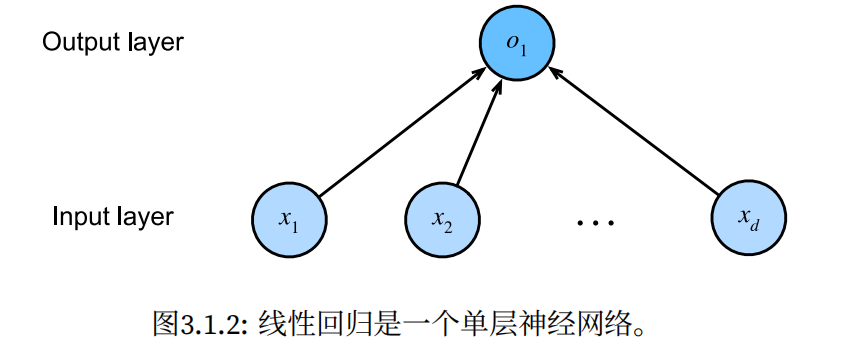

在图3.1.2所⽰的神经⽹络中输⼊为x1, . . . , xd，因此输⼊层中的输⼊数（或称为特征维度，feature dimensionality）为d。⽹络的输出为o1，因此输出层中的输出数是1。需要注意的是，输⼊值都是已经给定的，并且只有⼀个计算神经元。由于模型重点在发⽣计算的地⽅，所以通常我们在计算层数时不考虑输⼊层。也就是说，图3.1.2中神经⽹络的层数为1。我们可以将线性回归模型视为仅由单个⼈⼯神经元组成的神经⽹络，或称为单层神经⽹络。对于线性回归，每个输⼊都与每个输出（在本例中只有⼀个输出）相连，我们将这种变换（图3.1.2中的输出层）称为全连接层（fully-connected layer），或称为稠密层（dense layer）。

## softmax回归

<font size=3>前面介绍的线性回归模型适⽤于输出为连续值的情景。在另⼀类情景中，模型输出可以是⼀个像图像类别这样的离散值。对于这样的离散值预测问题，我们可以使⽤诸如 softmax 回归在内的分类模型。和线性回归不同，softmax 回归的输出单元从⼀个变成了多个，且引⼊了 softmax 运算使得输出更适合离散值的预测和训练。下面将以 softmax 回归模型为例，介绍神经⽹络中的分类模型。</font>

### Softmax 回归模型

下面我们考虑一个简单的图像分类问题，其输⼊图像的⾼和宽均为 2 个像素，且⾊彩为灰度。这样每个像素值都可以⽤⼀个标量表⽰。我们将图像中的四个像素分别记为 x1, x2, x3, x4。假设训练数据集中图像的真实标签为狗、猫或鸡（假设可以⽤ 4 个像素表⽰出这三种动物），这些标签分别对应离散值 y1, y2, y3。我们通常使⽤离散的数值来表⽰类别，例如 y1 = 1, y2 = 2, y3 = 3。如此，⼀张图像的标签为 1、 2 和 3 这三个数值中的⼀个。虽然我们仍然可以使⽤回归模型来进⾏建模，并将预测值就近定点化到 1、2 和 3 这三个离散值之⼀，但这种连续值到离散值的转化通常会影响到分类质量。因此我们⼀般使⽤更加适合离散值输出的模型来解决分类问题。

Softmax 回归跟线性回归⼀样将输⼊特征与权重做线性叠加。与线性回归的⼀个主要不同在于，softmax 回归的输出值个数等于标签⾥的类别数。因为⼀共有 4 种特征和 3 种输出动物类别，所以权重包含 12 个标量（带下标的 w）、偏差包含 3 个标量（带下标的 b）， o1, o2, o3计算公式如下:
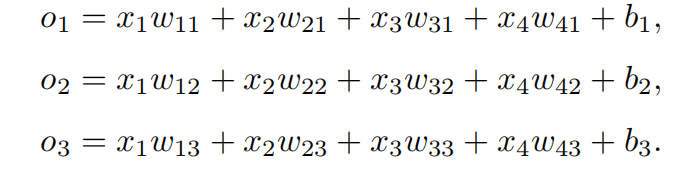

图 3.2 ⽤神经⽹络图描绘了上⾯的计算。Softmax 回归同线性回归⼀样，也是⼀个单层神经⽹络。由于每个输出 o1, o2, o3 的计算都要依赖于所有的输⼊ x1, x2, x3, x4，softmax 回归的输出层也是⼀个全连接层。
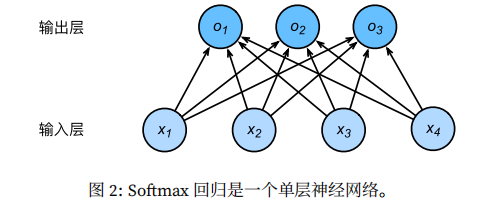

### Softmax运算

既然分类问题需要得到离散的预测输出，⼀个简单的办法是将输出值 oi 当做预测类别是 i 的置信度，并将值最⼤的输出所对应的类作为预测输出。例如，如果 o1, o2, o3 分别为 0.1, 10, 0.1，那么预测类别为 2，其代表猫。然而，直接使⽤输出层的输出有两点问题。⼀⽅⾯，由于输出层的输出值的范围不确定，我们难以直观上判断这些值的意义。例如，刚才举的例⼦中的输出值 10 表⽰“很置信”图像类别为猫，因为该输出值是其他两类的输出值的 100 倍。但如果 o1 = o3 = 1000，那么输出值 10 却⼜表⽰图像类别为猫的⼏率很低。另⼀⽅⾯，由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。Softmax 运算符（softmax operator）解决了以上两个问题。它通过下式将输出值变换成值为正且和为 1 的概率分布：$$\hat{y_1},\hat{y_2},\hat{y_3}=softmax(o_1,o_2,o_3)$$其中$$\hat{y_1}=\frac{exp(o_1)}{\sum_{i=1}^3exp(o_i)},\hat{y_2}=\frac{exp(o_2)}{\sum_{i=1}^3exp(o_i)},\hat{y_3}=\frac{exp(o_3)}{\sum_{i=1}^3exp(o_i)}$$可以看出他们值为正且合为一，这时候的输出值就是属于该类的概率，且不改变预测类别输出。

### 交叉熵损失函数

为方便进行矢量化计算我们可以对标签值进行one hot编码，即将标签转化为一个向量，向量的长度为类别个数，属于第i类则向量的第i个元素为1其余元素为0。这样我们的训练⽬标可以设为使预测概率分布 $\hat{yˆi}$ 尽可能接近真实的标签概率分布$ y^i$我们可以像线性回归那样使⽤平⽅损失函数。但是，想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率。例如在图像分类的例⼦⾥，如果$y^i = 3$，那么我们只需要$y^i_3$⽐其他两个预测值$y^i_1$和$y^i_2$⼤就⾏了。即$y^i_3$值为0.6，不管其他两个预测值为多少，类别预测均正确。而且平⽅损失过于严格，例如$y^i_1 = y^i_2 = 0.2$就⽐$y^i_1=0, y^i_2 = 0.4$的损失要小很多，虽然两者都有同样正确的分类预测结果。

改善上述问题的⼀个⽅法是使⽤更适合衡量两个概率分布差异的测量函数。其中，交叉熵（cross entropy）是⼀个常⽤的衡量⽅法：$$H(y^i,\hat{y^i})=-\sum_{j=1}^qy^i_jlog\hat{y^i_j}$$ 其中$y^i_j$是$y^i$中非0即1的元素。对于上面的例子$y^i$中只有一个元素为1其余元素为0，所以上面的式子（交叉熵）实际上只关注对正确类别的预测概率，因为只要其值足够大我们就可以确保分类正确。但是当我们遇到一个样本有多个标签的时候我们就不能做这步化简，但即便如此交叉熵也只关注图像中出现物体类别的预测概率。

假设训练数据集的样本数为 n，交叉熵损失函数定义为$$l(\Theta)=\frac{1}{n}\sum_{i=1}^nH(y^i,\hat{y^i})$$其中$\Theta$代表模型参数。

### 模型的预测及评价

在训练好 softmax 回归模型后，给定任⼀样本特征，我们可以预测每个输出类别的概率。通常，我们把预测概率最⼤的类别作为输出类别。如果它与真实类别（标签）⼀致，说明这次预测是正确的。我们将使⽤准确率（accuracy）来评价模型的表现。它等于正确预测数量与总预测数量之⽐。

## 两种方法实现线性回归模型

### 利⽤ NDArray 和 autograd 来实现⼀个线性回归的训练

In [1]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random #导入实验所用到的包或者模块

例子：构造一个简单的人工数据集，设训练数据集样本数为 1000，输⼊个数（特征数）为 2。我们使⽤线性回归模型真实权重$\mathbf{w} = [2, -3.4]^\top$、和偏差$b = 4.2$以及一个随机噪声项$\epsilon$（均值为0，标准差为0.01）来生成标签：
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$

In [3]:
 num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs)) #随机生成特征（均值为0方差为1、1000行2列）
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b #计算标签
labels += nd.random.normal(scale=0.01, shape=labels.shape) #加入噪声

In [4]:
features[0], labels[0] #给出第一个特征和他的标签值

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [11.562276]
 <NDArray 1 @cpu(0)>)

In [5]:
def data_iter(batch_size, features, labels): #定义函数每次返回batch_size个随机样本的特征和标签
    num_examples = len(features)
    indices = list(range(num_examples)) #得到样本列表
    random.shuffle(indices) # 将列表打乱
    for i in range(0, num_examples, batch_size): #从0到num_examples，步长为batch_size
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j) # take 函数根据索引返回对应元素。

In [6]:
batch_size = 10 #读取第一个小批量样本数据并打印
for X, y in data_iter(batch_size, features, labels):
    print(X, y) #X为10*2，y为10*1
    break


[[-0.44429994  0.42567226]
 [ 1.1619922   0.9391202 ]
 [ 0.2512343   1.4583403 ]
 [ 1.079772   -0.2146217 ]
 [-0.82027435  1.7071757 ]
 [-0.39093605  0.4425162 ]
 [-0.74370974 -0.20442331]
 [ 0.22657804  0.14714272]
 [ 0.2925654  -0.8840356 ]
 [ 1.5935714   0.4737738 ]]
<NDArray 10x2 @cpu(0)> 
[ 1.870883    3.346611   -0.24670357  7.1003685  -3.263574    1.9128927
  3.4067328   4.1467094   7.7841477   5.7758374 ]
<NDArray 10 @cpu(0)>


初始化模型参数

In [7]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1)) #w均值为0，标准差为0.01的正态分布
b = nd.zeros(shape=(1,))  #b初始化为0

In [8]:
 w.attach_grad() #创建参数梯度
b.attach_grad()

定义模型

In [9]:
 def linreg(X, w, b):
        return nd.dot(X, w) + b #dot函数做矩阵乘法

定义损失函数

In [10]:
def squared_loss(y_hat, y):
      return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 #除以2是为了求导后系数变为1

定义优化算法

In [11]:
 def sgd(params, lr, batch_size):  #sgd为小批量随机梯度下降算法，lr为学习率（超参数）
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs): # 训练模型⼀共需要 num_epochs 个迭代周期。
# 在⼀个迭代周期中，使⽤训练数据集中所有样本⼀次（假设样本数能够被批量⼤⼩整除）。
# X 和 y 分别是⼩批量样本的特征和标签。
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l 是有关⼩批量 X 和 y 的损失。
        l.backward() # 利用反向传播函数对⼩批量的损失对模型参数求梯度。
        sgd([w, b], lr, batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数。
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.054208
epoch 2, loss 0.000243
epoch 3, loss 0.000050


训练完成后，我们可以⽐较学到的参数和⽤来⽣成训练集的真实参数。它们应该很接近。

In [13]:
 true_w, w

([2, -3.4], 
 [[ 1.9991977]
  [-3.3994424]]
 <NDArray 2x1 @cpu(0)>)

In [14]:
true_b, b

(4.2, 
 [4.199049]
 <NDArray 1 @cpu(0)>)

### 线性回归的 Gluon 实现

<font size=3>使用MXNet提供的Gluon接口实现线性模型</font>

In [16]:
from mxnet import autograd,nd
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs)) #随机生成特征（均值为0方差为1、1000行2列）
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b #计算标签
labels += nd.random.normal(scale=0.01, shape=labels.shape) #加入噪声

<font size=3>Gluon 提供了 data 模块来读取数据。由于 data 常⽤作变量名，我们将导⼊的 data 模块⽤添加了 Gluon ⾸字⺟的假名 gdata 代替。在每⼀次迭代中，我们将随机读取包含 10 个数据样本的小批量。</font>

In [17]:
from mxnet.gluon import data as gdata
batch_size = 10
dataset = gdata.ArrayDataset(features, labels)  # 将训练数据的特征和标签组合。
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True) # 随机读取⼩批量。shuffle代表是否打乱数据

In [18]:
#读取第一个小批量数据样本并打印
for X, y in data_iter:  
    print(X, y)
    break


[[-0.07006842  0.6859183 ]
 [ 0.36674199 -0.26807195]
 [ 2.0179684  -0.2555399 ]
 [-1.660732    0.00256103]
 [-1.4045794  -0.9835713 ]
 [ 0.07015496 -0.45252782]
 [ 1.1172721   0.8596645 ]
 [-0.6325547  -0.37211055]
 [-0.25782487 -0.31795472]
 [-0.27269542 -1.4255825 ]]
<NDArray 10x2 @cpu(0)> 
[1.7332991  5.846716   9.093964   0.85241693 4.7418337  5.8665156
 3.4901423  4.204575   4.759521   8.503445  ]
<NDArray 10 @cpu(0)>


<font size=3>下⾯将介绍如何使⽤ Gluon 更简洁地定义线性回归。⾸先，导⼊nn（neural networks）模块。我们先定义⼀个模型变量 net，它是⼀个 Sequential 实例。在 Gluon中，Sequential 实例可以看作是⼀个串联各个层的容器。在构造模型时，我们在该容器中依次添加层。当给定输⼊数据时，容器中的每⼀层将依次计算并将输出作为下⼀层的输⼊。</font>

In [19]:
from mxnet.gluon import nn #定义模型
net = nn.Sequential()

<font size=3>在 Gluon 中，全连接层是⼀个 Dense 实例。我们定义该层输出个数为 1。另外在 Gluon 中我们⽆需指定每⼀层输⼊的形状，例如线性回归的输⼊个数。当模型
看⻅数据时，例如后⾯执⾏ net(X) 时，模型将⾃动推断出每⼀层的输⼊个数。</font>

In [20]:
net.add(nn.Dense(1))

<font size=3>我们从 MXNet导⼊ initializer 模块。该模块提供了模型参数初始化的各种⽅法。我们通过 init.Normal(sigma=0.01) 指定权重参数每个元素将在初始化时随机采样于均值为 0 标准差为 0.01 的正态分布。偏差参数默认会初始化为零。</font>

In [21]:
from mxnet import init #初始化模型参数
net.initialize(init.Normal(sigma=0.01))
from mxnet.gluon import loss as gloss #定义损失函数
loss = gloss.L2Loss() # 平⽅损失⼜称 L2 范数损失。

<font size=3>同样，我们也⽆需实现小批量随机梯度下降。在导⼊ Gluon 后，我们创建⼀个 Trainer 实例，并指定学习率为 0.03 的小批量随机梯度下降（sgd）为优化算法。该优化算法将⽤来迭代 net实例所有通过 add 函数嵌套的层所包含的全部参数。这些参数可以通过collect_params 函数获取。</font>

In [22]:
 from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

<font size=4>训练模型</font>

In [23]:
num_epochs = 3 #迭代次数为3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward() #小批量的损失对模型参数求梯度
        trainer.step(batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数，step中指明批量大小
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.037755
epoch 2, loss: 0.000140
epoch 3, loss: 0.000047


<font size=4>训练完成后可以通过net获得需要的层，并访问其权重（weight）和偏差（bias），从而得到学到的模型参数，然后再比较学到的参数和真实的参数，会发现两者非常接近。</font>

In [24]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 1.9991511 -3.399875 ]]
 <NDArray 1x2 @cpu(0)>)

In [25]:
true_b, dense.bias.data()

(4.2, 
 [4.200028]
 <NDArray 1 @cpu(0)>)